In [ ]:
import torch.nn as nn
import torch

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
MNISTClassifier = Net()

In [ ]:
# Load the pretrained weights
pretrained_path = r"D:\casestudy\mnist_classifier.pth"
MNISTClassifier.load_state_dict(torch.load(pretrained_path))

<All keys matched successfully>

In [ ]:
MNISTClassifier.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

C:\Users\Deepu Rajesh\AppData\Local\Temp\ipykernel_8116\161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Classified Results: [8, 4, 2, 6, 0, 8, 9, 0, 8, 4, 8, 4, 5, 8, 2, 4, 3, 9, 4, 8, 0, 3, 8, 6, 8, 5, 4, 0, 5, 0, 1, 6, 0, 8, 8, 3, 8, 8, 4, 7, 7, 0, 0, 6, 9, 4, 5, 8, 1, 8, 6, 5, 9, 4, 4, 8, 0, 7, 8, 2, 4, 6, 6, 0, 0, 4, 0, 8, 9, 3, 1, 8, 2, 8, 1, 4, 4, 0, 5, 8, 2, 6, 8, 9, 0, 0, 4, 4, 9, 9, 4, 8, 4, 1, 9, 8, 8, 9, 8, 6, 6, 2, 0, 8, 6, 8, 2, 4, 5, 0, 8, 9, 1, 4, 4, 6, 5, 8, 4, 5, 2, 4, 0, 6, 4, 4, 4, 8, 8, 9, 4, 9, 4, 4, 4, 3, 3, 0, 3, 5, 9, 0, 8, 7, 3, 7, 6, 5, 9, 9, 8, 8, 9, 4, 6, 8, 2, 3, 2, 7, 1, 7, 4, 8, 4, 9, 9, 8, 9, 8, 6, 0, 3, 0, 4, 8, 3, 2, 3, 0, 6, 9, 4, 9, 4, 2, 3, 8, 0, 2, 9, 3, 1, 4, 8, 8, 4, 8, 8, 8, 7, 8, 6, 7, 8, 4, 2, 2, 2, 8, 6, 6, 8, 9, 8, 8, 9, 8, 7, 8, 9, 8, 5, 8, 2, 0, 8, 7, 8, 9, 9, 4, 1, 0, 4, 8, 4, 8, 3, 0, 8, 6, 9, 6, 6, 0, 7, 4, 9, 2, 4, 0, 8, 8, 4, 6, 2, 7, 2, 5, 4, 2, 9, 0, 6, 8, 3, 1, 2, 0, 2, 2, 0, 2, 4, 7, 9, 0, 8, 0, 8, 3, 4, 0, 7, 2, 6, 7, 3, 6, 4, 4, 8, 3, 8, 8, 8, 3, 8, 4, 5, 4, 4, 8, 8, 5, 6, 0, 3, 3, 8, 3, 8, 3, 8, 2, 8, 2, 7, 9, 8, 2, 0, 4, 8, 8, 4

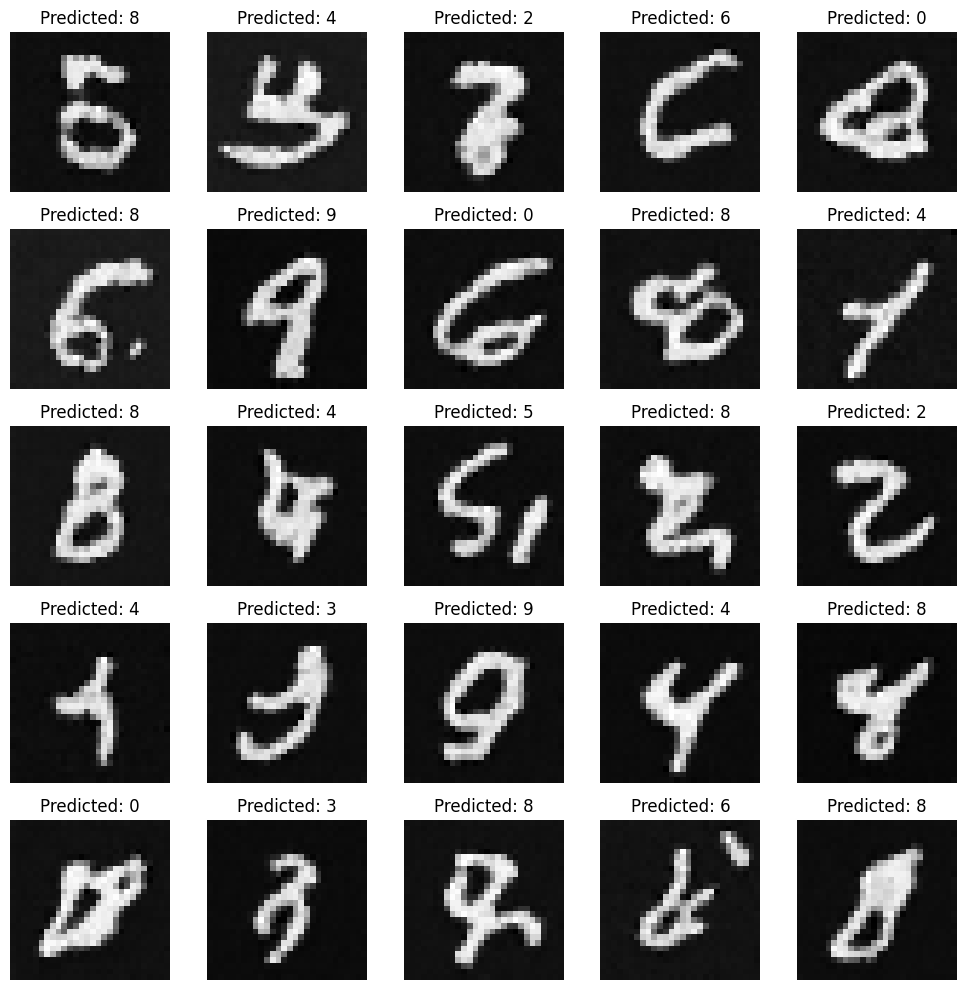

In [ ]:
import os
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define your GAN generated images dataset class
class GANGeneratedDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name).convert('L')  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image

# Define a function to display images along with their predicted class
def display_images_with_predictions(images, predicted_classes):
    num_images = len(images)
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    for i in range(5):
        for j in range(5):
            idx = i * 5 + j
            image = images[idx].squeeze().numpy()  # Squeeze the image tensor to remove the channel dimension
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].set_title(f"Predicted: {predicted_classes[idx]}")
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Load the GAN generated images dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

gan_dataset = GANGeneratedDataset(root_dir= r"D:\case_study\DIFF\diff2_generated", transform=transform)
data_loader = DataLoader(dataset=gan_dataset, batch_size=25, shuffle=False)

# Classify the GAN generated images
classified_results = []
images_to_display = []

for batch_idx, images in enumerate(data_loader):
    outputs = MNISTClassifier(images)
    _, predicted = torch.max(outputs, 1)
    classified_results.extend(predicted.tolist())
    images_to_display.extend(images)

# Print the classified results
print("Classified Results:", classified_results)

# Display the images in a 5x5 grid along with their predicted class
display_images_with_predictions(images_to_display, classified_results)


In [ ]:
from collections import Counter

# Count the occurrences of each digit
digit_counts = Counter(classified_results)

# Print the counts
for digit, count in digit_counts.items():
    print(f"Digit {digit}: {count} occurrences")


Digit 8: 716 occurrences
Digit 4: 446 occurrences
Digit 2: 336 occurrences
Digit 6: 298 occurrences
Digit 0: 337 occurrences
Digit 9: 313 occurrences
Digit 5: 168 occurrences
Digit 3: 219 occurrences
Digit 1: 118 occurrences
Digit 7: 185 occurrences


In [ ]:

# Define a function to display images along with their predicted class
def display_images_with_predictions(images, predicted_classes, target_digit=None, num_samples=25):
    if target_digit is not None:
        filtered_images = [img for img, pred in zip(images, predicted_classes) if pred == target_digit]
    else:
        filtered_images = images

    num_images = len(filtered_images)
    num_samples = min(num_samples, num_images)
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    for i in range(5):
        for j in range(5):
            idx = i * 5 + j
            if idx < num_samples:
                image = filtered_images[idx].squeeze().numpy()  # Squeeze the image tensor to remove the channel dimension
                axes[i, j].imshow(image, cmap='gray')
                axes[i, j].set_title(f"Predicted: {target_digit if target_digit is not None else '?'}")
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()


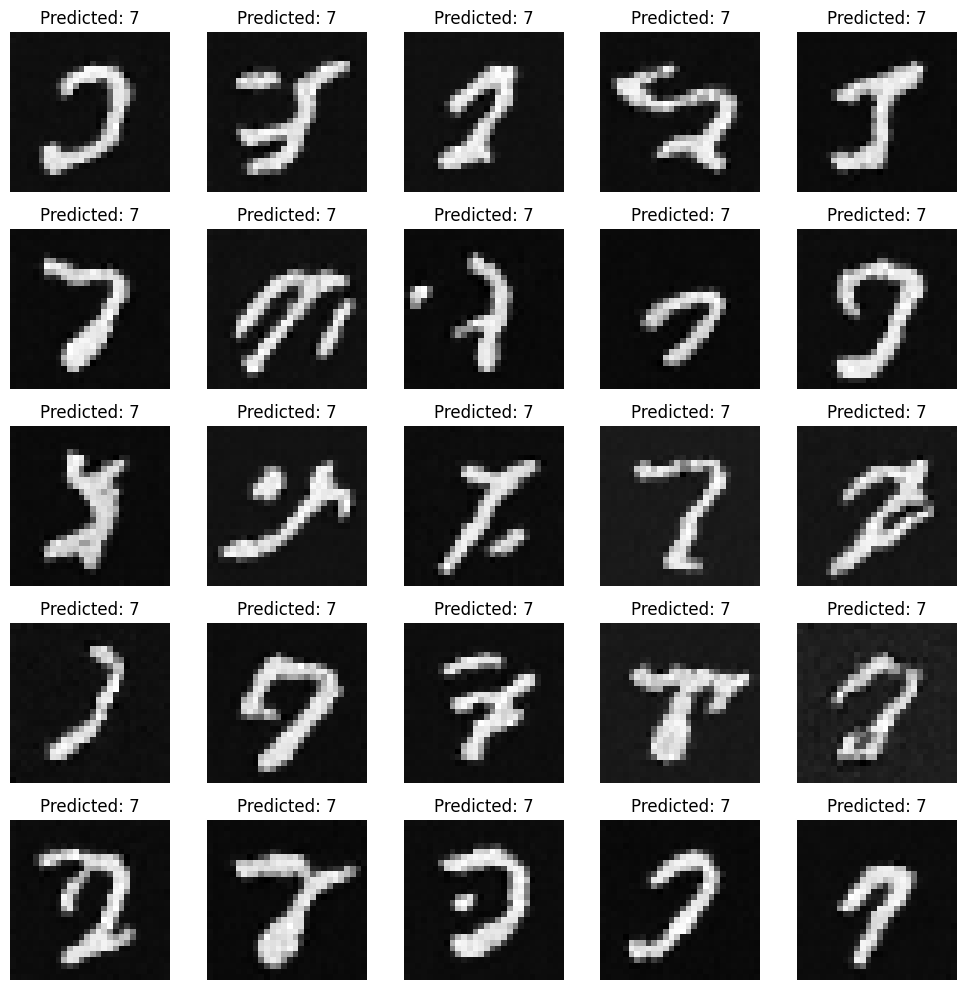

In [ ]:

# Display samples of a specific digit (e.g., digit 7)
display_images_with_predictions(images_to_display, classified_results, target_digit=7, num_samples=25)